<a href="https://colab.research.google.com/github/GraceWei613/Generative_AI_Grace/blob/main/HW3_GAN%E6%A8%A1%E5%9E%8B%E6%93%8D%E4%BD%9C%E5%88%86%E6%9E%90_%E9%AD%8F%E4%B8%BB%E9%A6%A861321034L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#以下為運用chatGPT設計之生成對抗網路之程式模型，使用**StyleGAN**為主題。

1. 載入必要套件



In [ ]:
import torch
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

2. 使用 CelebA-HQ 1024x1024 的預訓練模型

In [ ]:
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo', 'StyleGAN', model_name='celebAHQ-1024', pretrained=True)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_main


Loading default model : Flickr-HQ
Average network found !


3. 產生隨機噪聲（latent vector）

In [ ]:
    z = torch.randn(1, 512)

4. 使用 PGAN 生成圖片

In [ ]:
with torch.no_grad():
    generated_image = model.test(z)

5. 轉換為 PIL 圖片格式

In [ ]:
generated_image = (generated_image - generated_image.min()) / (generated_image.max() - generated_image.min())
transform = transforms.ToPILImage()
image = transform(generated_image.squeeze(0))
image.show()

6. 顯示圖片

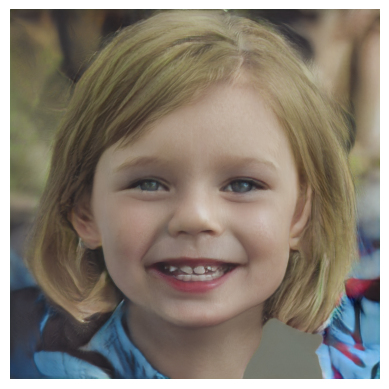

In [ ]:
plt.imshow(image)
plt.axis("off")
plt.show()

7. 下載圖片（可選）

In [ ]:
from torchvision.utils import save_image
from google.colab import files
save_image(generated_image, "generated_stylegan.png")
files.download("generated_stylegan.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#作業說明：

1、這是人臉主題的StyleGAN。

2、模型來源:https://github.com/NVlabs/stylegan
StyleGAN於2018年由NVIDIA團隊提出，於2019年發表。此模型專門用於生成高質量的合成影像，特別在人臉生成領域有突破性的發展。StyleGAN主要架構為：

(1) 生成器(Generator)

(2) 判別器(Discriminator)

(3) 躁聲控制(z)

3、生成圖片範例:
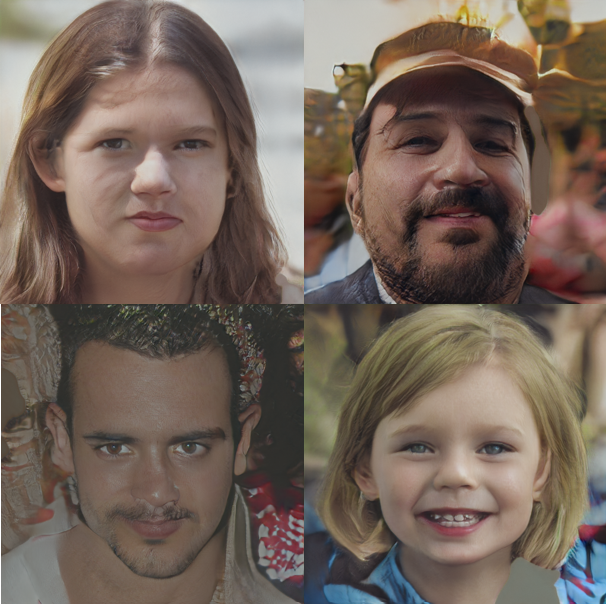

4、現在較少使用GAN生成圖片可能原因:

(1) GAN有不穩定性:由上面的圖片範例可以看出，用GAN生成的圖片具有不穩定性，這使得五官、臉型有時會不自然，甚至背景會扭曲。

(2) GAN有模式崩潰(Mode Collapse)的問題，這使得生成出來的圖片較為單一，缺乏多樣性。

(3) GAN也有梯度消失(Vanishing Gradient)的問題，這使得生成器無法有效學習，圖片的品質因此停滯不前。

(4) 因擴散模型(Diffusion Models)興起，其穩定性高、更強的細節處理、多樣性都使得GAN漸漸式微，取代GAN成為主流的圖像生成方式。